# DataGym
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:
df_descr = pd.read_csv('otp_description.csv', sep='\t', encoding='utf8')

In [9]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не знаем)

In [4]:
df_train = pd.read_csv('otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [10]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [11]:
df_train['sample'] = 'train'
df_test['sample'] = 'test'

In [45]:
df = df_test.append(df_train).reset_index(drop=True)

In [46]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [48]:
for i in df_train.columns:                      # перебираем все столбцы
    if str(df_train[i].dtype) == 'object':      # если тип столбца - object
        print('='*10)
        print(i)                                # выводим название столбца
        print(set(df_train[i]))                 # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n')                             # выводим пустую строку

EDUCATION
{'Высшее', 'Среднее специальное', 'Два и более высших образования', 'Среднее', 'Неоконченное высшее', 'Ученая степень', 'Неполное среднее'}


MARITAL_STATUS
{'Состою в браке', 'Не состоял в браке', 'Гражданский брак', 'Вдовец/Вдова', 'Разведен(а)'}


GEN_INDUSTRY
{nan, 'Страхование', 'Информационные технологии', 'Энергетика', 'Туризм', 'Транспорт', 'Логистика', 'Подбор персонала', 'Здравоохранение', 'Коммунальное хоз-во/Дорожные службы', 'Государственная служба', 'Развлечения/Искусство', 'Управляющая компания', 'Сельское хозяйство', 'Химия/Парфюмерия/Фармацевтика', 'Ресторанный бизнес/Общественное питание', 'Сборочные производства', 'Образование', 'Торговля', 'Нефтегазовая промышленность', 'Юридические услуги/нотариальные услуги', 'Банк/Финансы', 'СМИ/Реклама/PR-агенства', 'Металлургия/Промышленность/Машиностроение', 'Салоны красоты и здоровья', 'Недвижимость', 'Другие сферы', 'Наука', 'Информационные услуги', 'ЧОП/Детективная д-ть', 'Строительство', 'Маркетинг'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [49]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
# так это исправляется, но результат не записывается никуда)

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Заполните их нулями

In [50]:
df.fillna('0', inplace=True)

#### Задание 2. В данных есть признаки, которые можно назвать категориальным, например семейный статус
 {'Состою в браке', 'Разведен(а)', 'Не состоял в браке', 'Вдовец/Вдова', 'Гражданский брак'}
 и таких много
#### Закодируйте их числами (например идентификаторами 1, 2, 3, ... )
#### Можно иначе, если есть идеи как.

In [51]:
df.iloc[:, 10:].head()

,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,Образование,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,7000,Красноярский край,Красноярский край,Красноярский край,...,1,2,2,8,0,0,0,0,0,test
1,0,0,0,0,0,от 10000 до 20000 руб.,4100,Орловская область,Орловская область,Орловская область,...,0,2,1,15,0,0,0,0,0,test
2,Металлургия/Промышленность/Машиностроение,Специалист,Частная компания,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,40000,Коми,Коми,Коми,...,1,1,1,1,0,0,0,0,0,test
3,Другие сферы,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,20000,Читинская область,Читинская область,Читинская область,...,1,3,2,9,0,0,0,0,0,test
4,Образование,Специалист,Государственная комп./учреж.,Без участия,Вспомогательный техперсонал,от 20000 до 50000 руб.,17000,Хабаровский край,Хабаровский край,Хабаровский край,...,1,1,1,5,0,0,0,0,0,test


In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'POSTAL_ADDRESS_PROVINCE', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 
'TP_PROVINCE', 'REGION_NM']:
    try:
        le.fit(df[i])
        df[i] = le.transform(df[i])
    except:
        next

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками (см задание 1)
* Кодировала категориальные признаки (см задание 2) Если закодировать признаки вам не удалось - удалите все что не числа

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [64]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    ## Your Code Here
    
    df_output.drop('AGREEMENT_RK', axis=1, inplace=True)
    
    df_output.fillna('0', inplace=True)
    
    for i in ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']:
        df_output[i] = df_output[i].map(lambda x: x.replace(',', '.')).astype('float')
    
    for i in ['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'POSTAL_ADDRESS_PROVINCE', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 
'TP_PROVINCE', 'REGION_NM', 'sample']:
        try:
            le.fit(df_output[i])
            df_output[i] = le.transform(df_output[i])
        except:
            next
            
    df_output['WORK_TIME'].astype('int', inplace=True)
    df_output['PREVIOUS_CARD_NUM_UTILIZED'].astype('int', inplace=True)
    
    return df_output

In [65]:
df_preproc = df.pipe(preproc_data) # применит вашу написанную выше функцию к датафрейму и вернут новый

#### Задание 4. Выше мы собрали данные в один датафрейм и записали столбец sample, чтоб было видно где что осталось.
#### ... напишите код, который разделит df_preproc на 2 части train и test (записав в df_train_preproc и df_test_preproc соответственно)
#### ... удалив колонку sample

In [76]:
df_train_preproc = df_preproc[df_preproc['sample'] == 0].drop('sample', axis=1)
df_test_preproc = df_preproc[df_preproc['sample'] == 1].drop('sample', axis=1)

#### Задание 5. Отделите целевую переменную и остальные признаки (речь не про train_test_split)
Выше у вас получились матрицы df_train_preproc и df_test_preproc

Должно получится:
* 2 матрицы: X и X_valid
* 2 вектора: y и y_valid


* где X - все данные df_train_preproc, кроме TARGET
* где X_valid - все данные df_test_preproc, кроме TARGET
* где y - TARGET от df_train_preproc
* где y_valid - TARGET от df_test_preproc

In [109]:
X = df_train_preproc.drop('TARGET', axis=1)
y = df_train_preproc['TARGET']

X_valid = df_test_preproc.drop('TARGET', axis=1)
y_valid = df_test_preproc['TARGET']

#### Задание 6. Обучение и оценка качества разных моделей

In [79]:
# Поделите данные X и y на 2 части (train и test, размером от исходного 70% и 30% соответственно)

from sklearn.model_selection import train_test_split

## Your Code Here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [82]:
# Попробовать следующие "черные ящики": интерфейс у всех одинаковый 
# Постепенно мы узнаем, что они делаютб а сейчас учимся выбирать какой работает качественнее
#     fit, 
#     predict
# записав предсказания в pred_1, pred_2, pred_3

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

tree = DecisionTreeClassifier()
forest = RandomForestClassifier()
logreg = LogisticRegression()

tree.fit(X_train, y_train)
forest.fit(X_train, y_train)
logreg.fit(X_train, y_train)

pred1 = tree.predict(X_test)
pred2 = forest.predict(X_test)
pred3 = logreg.predict(X_test)

In [85]:
# Посчитать метрики стандартные
# accuracy, precision, recall, а1
# в pred_1, pred_2, pred_3 у вас должны лежать предсказания разных "ящиков"
# посчитайте метрики для каждого

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

tree_accuracy = accuracy_score(y_test, pred1)
forest_accuracy = accuracy_score(y_test, pred2)
logreg_accuracy = accuracy_score(y_test, pred3)

tree_precision = precision_score(y_test, pred1)
forest_precision = precision_score(y_test, pred2)
logreg_precision = precision_score(y_test, pred3)

tree_recall = recall_score(y_test, pred1)
forest_recall = recall_score(y_test, pred2)
logreg_recall = recall_score(y_test, pred3)

tree_f1 = f1_score(y_test, pred1)
forest_f1 = f1_score(y_test, pred2)
logreg_f1 = f1_score(y_test, pred3)

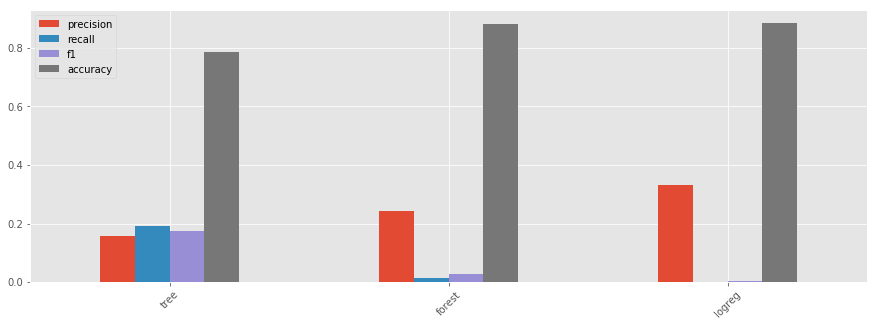

In [128]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить  качество)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

## Your Code Here
df = pd.DataFrame({'precision': [tree_precision, forest_precision, logreg_precision], 
                   'recall': [tree_recall, forest_recall, logreg_recall], 
                   'f1': [tree_f1, forest_f1, logreg_f1], 
                   'accuracy': [tree_accuracy, forest_accuracy, logreg_accuracy]})
df.index = ['tree', 'forest', 'logreg']

plt.rcParams["figure.figsize"] = (15,5)
df.plot(kind='bar')
plt.xticks(rotation=45);

#### Задание 7. Заключительное.
#### Выше вы можете выборать самую лучшую модель "коробочку" по метрике F1
#### Теперь вы знаете какой тип коробочки из представленных лучше всего работает на данной задаче
#### Пора: 1) заново объявить эту коробочку
#### 2) обучить на всем X,y
#### 3) протестировать на отложенном X_valid, y_valid

In [110]:
# Взять лучшую модель и сделать предсказания для X_valid выборки

tree.fit(X, y)

pred_final = tree.predict(X_valid)


 Precision: 0.16383082158483228 
 Recall: 0.1859823399558499 
 F1: 0.1742052209873352 
 Accuracy: 0.7901202128358406


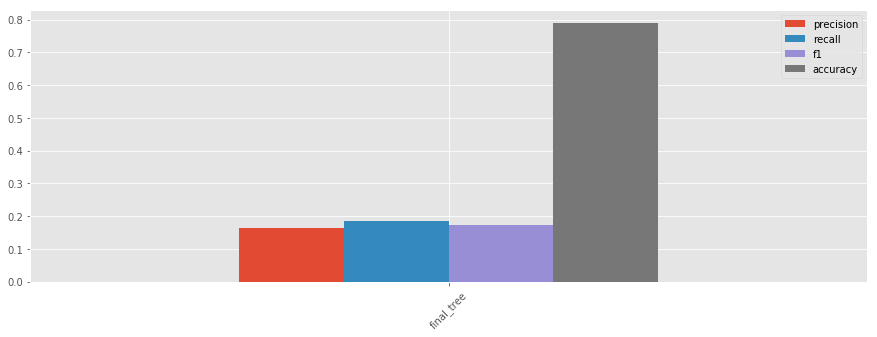

In [129]:
# Посчитать метрики на полученном предсказании


final_accuracy = accuracy_score(y_valid, pred_final)
final_precicion = precision_score(y_valid, pred_final)
final_recall = recall_score(y_valid, pred_final)
final_f1 = f1_score(y_valid, pred_final)

final_df = pd.DataFrame({'precision': [final_precicion], 'recall': [final_recall], 'f1': [final_f1], 'accuracy': [final_accuracy]})

final_df.index = ['final_tree']
print(' Precision:', final_precicion, '\n', 'Recall:', final_recall, '\n', 'F1:', final_f1, '\n', 'Accuracy:', final_accuracy)
final_df.plot(kind='bar')
plt.xticks(rotation=45);

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который мы посмотрим и в случае чего откомментируем. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность